<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Trabajo Practico</h3>
    <h5>Grupo 4</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Braian Drago <p>
        <p>Integrantes: Garnica Hernán - Scime Silvia
</div>

# Serie de tiempo: Consumo

Se analizará a continuación una serie de tiempo correspondiente al consumo de algunas líneas urbanas de Rosario. El consumo se calcula en litros de combustible consumidos cada 100 kilómetros realizados [lts/100km].
Esta serie se complementa a las otras series analizadas: total de pasajeros que marcaron pasaje y total de kilómetros realizados por las unidades.
Se cuentan con datos diarios y el objetivo del análisis es evaluar la relación entre estas 3 importantes variables para la operación del servicio. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta


import warnings
warnings.filterwarnings('ignore')

#!pip install statsmodels


####  Leemos los datos a trabajar


In [3]:
url= 'https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/Consumo_TP.csv'
raw_csv_data = pd.read_csv(url, sep=',', decimal='.')
df_consumo=raw_csv_data.copy()

#### Breve resumen del dataset


In [4]:
print(df_consumo.columns)

df_consumo.Consumo.mean()

Index(['Fecha', 'Consumo'], dtype='object')


45.95726011089604

In [5]:
df_consumo.head(10)

,Fecha,Consumo
0,2023-06-05,46.488384
1,2023-05-23,46.161079
2,2023-05-22,45.449817
3,2023-05-20,43.725000
4,2023-05-19,44.884902
5,2023-05-18,46.485462
6,2023-05-17,46.089042
7,2023-05-16,45.802815
8,2023-05-15,45.871810
9,2023-05-13,44.398464


In [6]:
df_consumo.Fecha.describe()

count            757
unique           757
top       2023-06-05
freq               1
Name: Fecha, dtype: object

In [7]:
df_consumo.dtypes

Fecha       object
Consumo    float64
dtype: object

Adaptamos el dataset para trabajarlo segun sus series temporales

In [8]:
df_consumo.Fecha = pd.to_datetime(df_consumo.Fecha, dayfirst = True)

In [9]:
df_consumo.head()

,Fecha,Consumo
0,2023-06-05,46.488384
1,2023-05-23,46.161079
2,2023-05-22,45.449817
3,2023-05-20,43.725000
4,2023-05-19,44.884902


In [10]:
df_consumo.Fecha.describe()

count                     757
unique                    757
top       2023-06-05 00:00:00
freq                        1
first     2021-10-01 00:00:00
last      2023-10-31 00:00:00
Name: Fecha, dtype: object

In [11]:
df_consumo.dtypes

Fecha      datetime64[ns]
Consumo           float64
dtype: object

In [12]:
from skimpy import skim

In [13]:
skim(df_consumo)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 757    │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Consumo            │    0 │       0 │      46 │    3.8 │    0 │    44 │    46 │    48 │      56 │      ▇▇  │  │
│ └────────────────────┴──────┴─────────┴─────────┴────────┴──────┴───────┴───────┴───────┴─────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Fecha                  │      0 │         0 │     2021-10-01      │     2023-10-31      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Preparación de los datos

Se puede observar que hay al menos 1 día con consumo igual a 0. Se analizará esto.

In [14]:
df_consumo.iloc[df_consumo.Consumo.argmin()]

Fecha      2022-05-17 00:00:00
Consumo                    0.0
Name: 756, dtype: object

El día 2022-05-17 hubo paro de transporte y no hubo carga de combustible, es por este motivo qe retirar del dataset ya que no representa un valor real de consumo. Luego, los datos faltantes en la serie se imputarán ya que estos modelos no permiten valores nan.

In [15]:
df_consumo = df_consumo.loc[df_consumo.Consumo>0]

Seteamos como index del dataset segun el dia

In [16]:
df_consumo.set_index("Fecha", inplace=True)
df_consumo.head()

,Consumo
Fecha,
2023-06-05,46.488384
2023-05-23,46.161079
2023-05-22,45.449817
2023-05-20,43.725000
2023-05-19,44.884902


Adaptamos el datset segun una frecuencia diaria de la serie temporal.

In [17]:
df_consumo=df_consumo.asfreq('d')
df_consumo.head()

,Consumo
Fecha,
2021-10-01,45.201497
2021-10-02,39.899719
2021-10-03,39.705724
2021-10-04,45.777167
2021-10-05,46.147136


In [18]:
df_consumo.isna()

,Consumo
Fecha,
2021-10-01,False
2021-10-02,False
2021-10-03,False
2021-10-04,False
2021-10-05,False
...,...
2023-10-27,False
2023-10-28,False
2023-10-29,False


In [19]:
df_consumo.isna().sum()

Consumo    5
dtype: int64

Como se puede ver, hay 5 días en los que no hay registro de consumo debido a que no hubo carga de combustible. Se analizará de qué días se trata.

In [20]:
sin_consumo = df_consumo[df_consumo.Consumo.isna()].reset_index().Fecha
print(sin_consumo)

0   2022-05-17
1   2022-10-12
2   2022-10-13
3   2023-06-13
4   2023-06-22
Name: Fecha, dtype: datetime64[ns]


Estos 5 días sin carga de combustible corresponden a días en donde hubo medidas gremiales y no hubo servicio de transporte. En el mes de junio 2022 se puede observar que hubo 2 días consecutivos de paros. 
Estos casos son imposibles de predecir para un modelo y se completarán con una media de los valores cercanos para no dañar el modelo.

Para imputar los valores ausentes de la serie se utilizará el promedio de los valores de consumo para ese día de la semana en la semana anterior y en la semana posterior.

In [21]:
for i in sin_consumo:
  df_consumo.loc[i, "Consumo"] = (df_consumo.loc[i + timedelta(days=-7), "Consumo"] + df_consumo.loc[i + timedelta(days=7), "Consumo"])/2

Estos son los valores imputados:

In [22]:
df_consumo.loc[sin_consumo,]

,Consumo
Fecha,
2022-05-17,44.193725
2022-10-12,46.886405
2022-10-13,48.158563
2023-06-13,43.781655
2023-06-22,46.095441


## Visualización de la serie

Visualizamos una vez mas el dataset, pero esta vez teniendo en cuenta la serie temporal

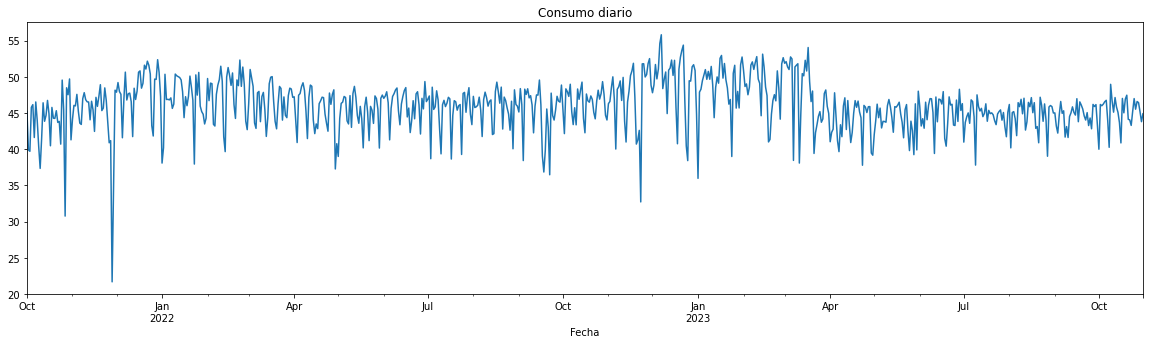

In [23]:
df_consumo.Consumo.plot(figsize=(20,5), title = "Consumo diario")
plt.show()

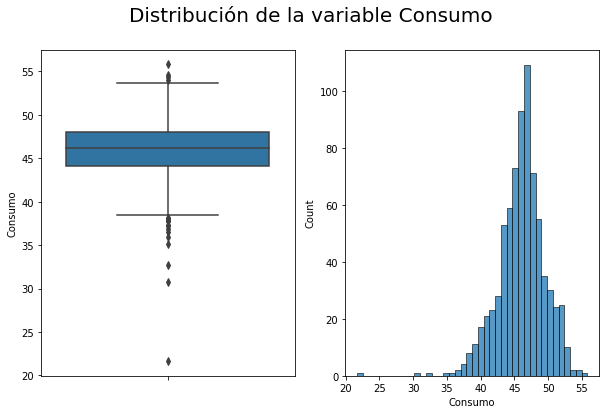

In [24]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de la variable Consumo', fontsize = 20)


sns.histplot(data = df_consumo, x="Consumo", ax = axs[1]);
sns.boxplot(y = "Consumo", data = df_consumo, ax = axs[0]);


Como se puede ver en las gráficas la distribución de la variable consumo tiene asimetría izquierda y no presenta una distribución normal.

In [25]:
import scipy.stats
import pylab
from matplotlib import pyplot as plt
from scipy import stats
from matplotlib import pyplot
from scipy.stats import jarque_bera, shapiro, boxcox, probplot

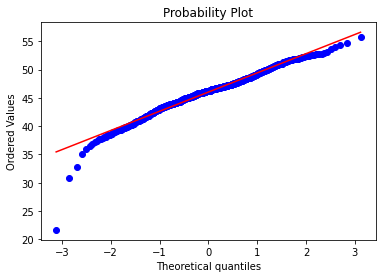

In [26]:
scipy.stats.probplot(df_consumo.Consumo, plot = plt, fit=True, dist='norm');

La variable consumo tiene una asimetría a la izquierda, habiendo días en donde el consumo fue muy bajo. En el QQ plot se puede ver como la cola de la izquierda es muy "pesada".

### Descomposición de la Serie Temporal

In [27]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

#### Descomposicion Aditiva

In [28]:
#df_consumo = df_consumo.asfreq('d')

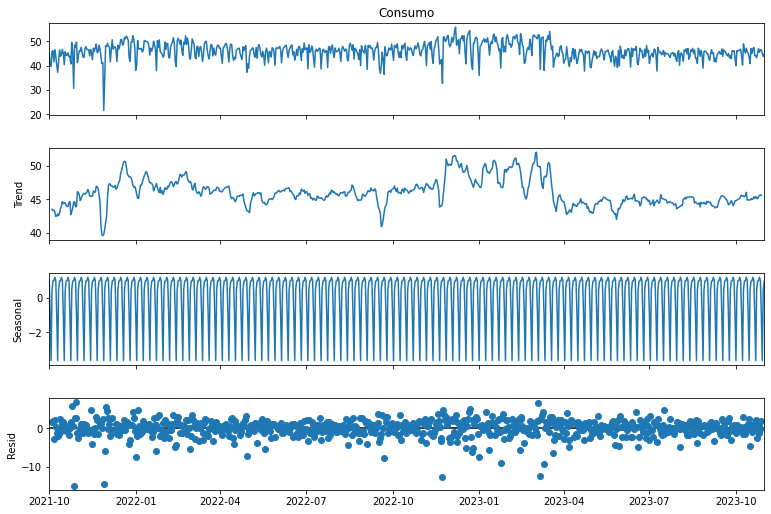

In [29]:
s_dec_additive = seasonal_decompose(df_consumo.Consumo, model = "adittive")
fig = s_dec_additive.plot()
fig.set_size_inches(12,8)
plt.show()

Se visualiza la tendencia de la serie.

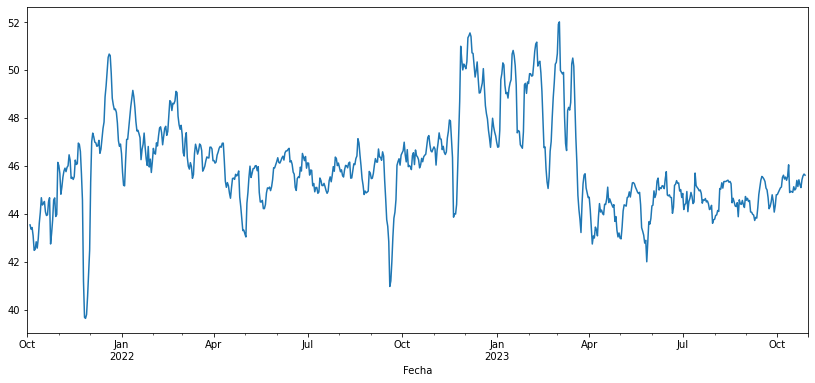

In [30]:
plt.figure( figsize = (14,6))
s:s_dec_additive.trend.plot()
plt.show()

La serie presenta estacionalidad, se verá a continuación.

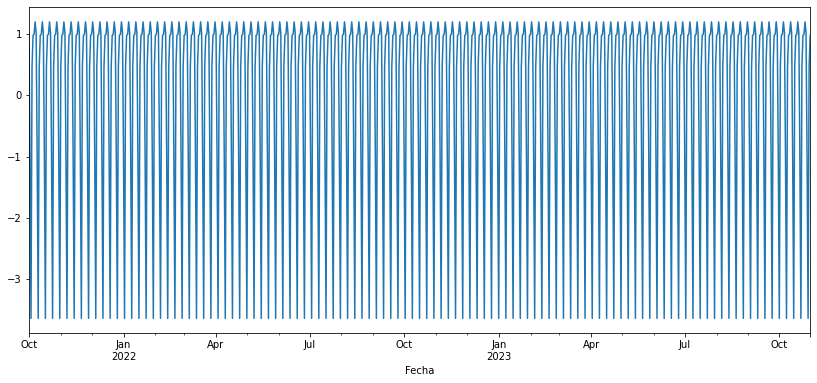

In [31]:
plt.figure( figsize = (14,6))
s_dec_additive.seasonal.plot()
plt.show()


Se visualizan los residuos.

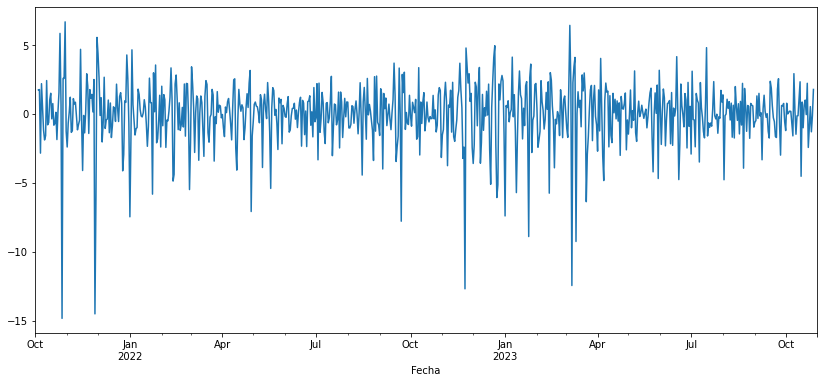

In [32]:
plt.figure( figsize = (14,6))
s_dec_additive.resid.plot()
plt.show()


In [33]:
print('Media de los residuos es',round(np.mean(s_dec_additive.resid), 4))

Media de los residuos es 0.0022


In [34]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.tsa.stattools as tsa
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest


In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima, ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
import statsmodels.api as sm

In [36]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [37]:
s_dec_additive.resid.describe()

count    755.000000
mean       0.002195
std        2.240277
min      -14.830995
25%       -0.985635
50%        0.220033
75%        1.291368
max        6.712733
Name: resid, dtype: float64

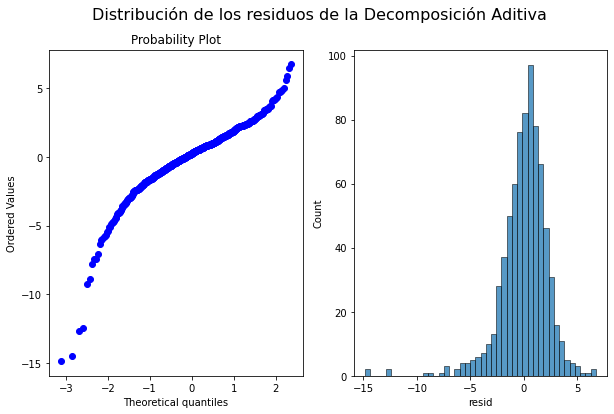

In [38]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle("Distribución de los residuos de la Decomposición Aditiva", size = 16)


sns.histplot(data = s_dec_additive, x=s_dec_additive.resid, ax = axs[1]);
scipy.stats.probplot(s_dec_additive.resid, plot = axs[0], fit=True, dist='norm');

Algunas conclusiones obtenidas a partir de la descomposición aditiva de la serie.
- La variable Consumo no se distribuye normalmente
- Presenta una estacionalidad cada 7 períodos, una semana.
- Los residuos de la descomposición aditiva no se distribuyen de forma normal, aunque sí tienen media muy cercana a 0.

#### Descomposicion Multiplicativa

In [39]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0]

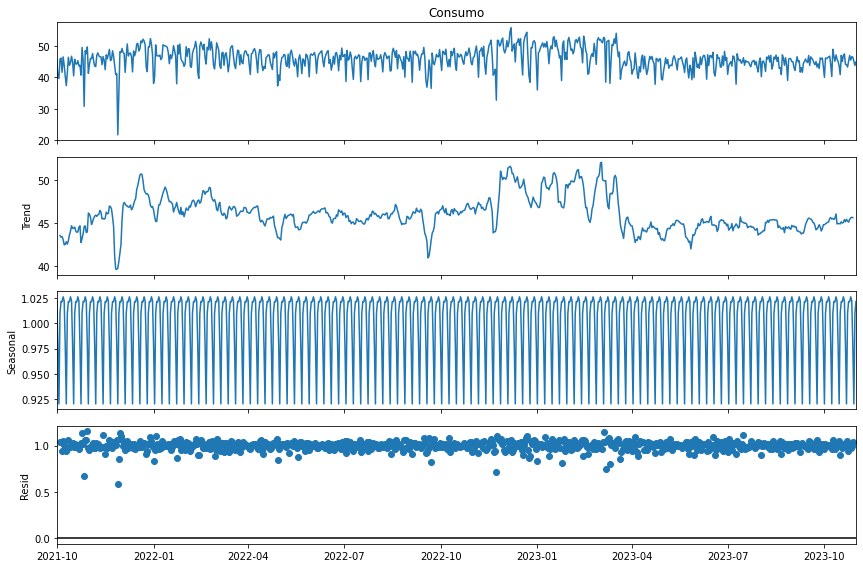

In [40]:
s_dec_multiplicative = seasonal_decompose(df_consumo.Consumo, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

A continuación se visualiza la tendencia

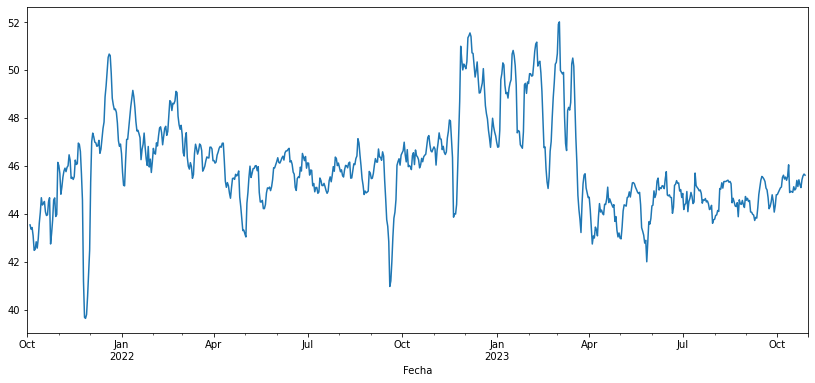

In [41]:
plt.figure( figsize = (14,6))
s_dec_multiplicative.trend.plot()
plt.show()

Se visualiza a continuación la estacionalidad.

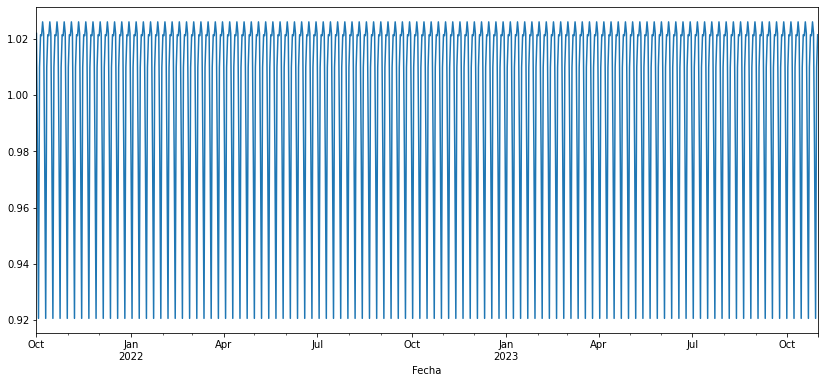

In [42]:
plt.figure( figsize = (14,6))
s_dec_multiplicative.seasonal.plot()
plt.show()

Se visualizan los residuos del modelos.

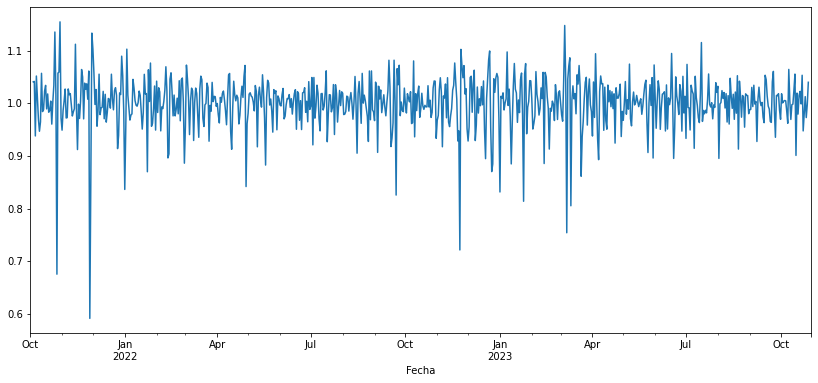

In [43]:
plt.figure( figsize = (14,6))
s_dec_multiplicative.resid.plot()
plt.show()

In [44]:
s_dec_multiplicative.resid.describe()

count    755.000000
mean       0.999960
std        0.049896
min        0.591356
25%        0.979091
50%        1.004941
75%        1.026911
max        1.154617
Name: resid, dtype: float64

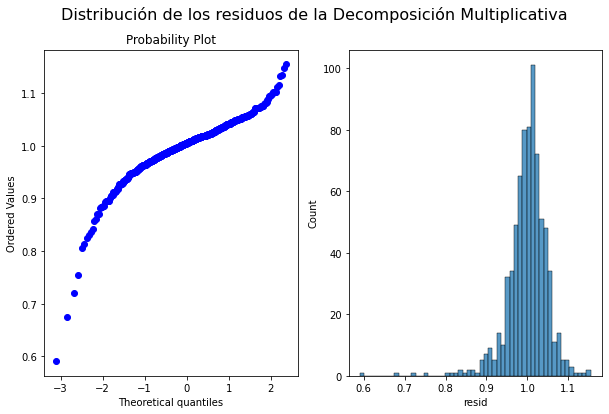

In [45]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle("Distribución de los residuos de la Decomposición Multiplicativa", size = 16)


sns.histplot(data = s_dec_multiplicative, x=s_dec_multiplicative.resid, ax = axs[1]);
scipy.stats.probplot(s_dec_multiplicative.resid, plot = axs[0], fit=True, dist='norm');

Los residuos de la descomposición multiplicativa presentan una distribución con mayor asimetría que la descomposición aditiva y tienen media cercana a 1.

#### Representación gráfica de la Función de Autocorrelación

In [46]:
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [47]:
matplotlib.rcParams['figure.figsize']=[10.0,4.0]

Gráfico de Autocorrelaciones

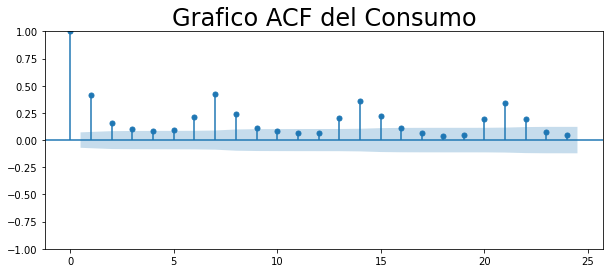

In [48]:
plot_acf(df_consumo.Consumo,lags=24)
plt.title("Grafico ACF del Consumo", size= 24)
plt.show()

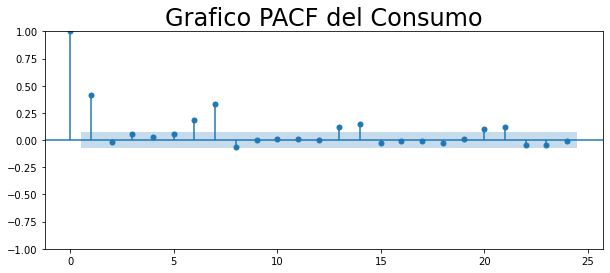

In [49]:
plot_pacf(df_consumo.Consumo,lags = 24)
plt.title("Grafico PACF del Consumo", size= 24)
plt.show()

In [50]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr_1serie(serie_r, nrol= 75 , titulo_1 = 'Serie: Consumo'):
  p1, axes=plt.subplots(3,1,figsize=(18,10),sharex=True, sharey=False )
  axes[2].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title=titulo_1)
  plot_pacf(serie_r, lags=nrol, ax= axes[1], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')


  p1.legend()
  plt.show()

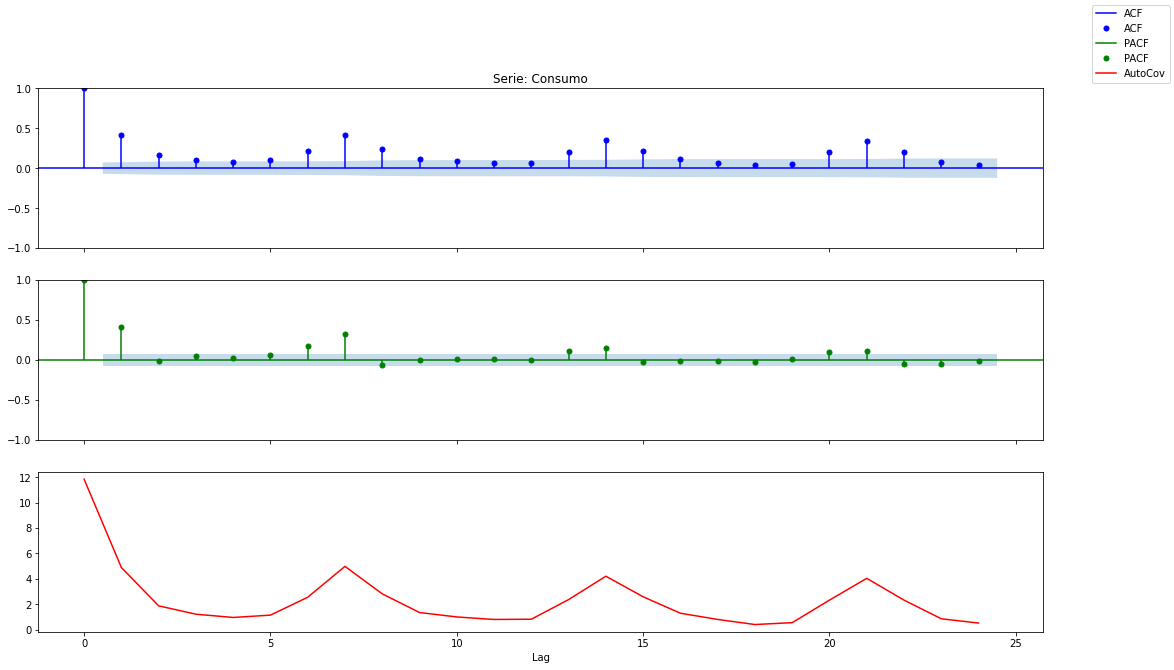

In [51]:
autocov_autocorr_1serie(df_consumo.Consumo,24)

Se puede ver que la serie es no estacionaria y que presenta estacionalidad cada 7 períodos. Se revisarán los test estadícos para confirmar.

In [52]:
def estacionario(y):
  # Estimado de número de diferencias con ADF test:Dickey-Fuller
  n_adf = ndiffs(y, test='adf')  # -> 0

  # KPSS test (auto_arima default): Kwiatkowski-Phillips-Schmidt-Shin
  n_kpss = ndiffs(y, test='kpss')  # -> 0

  # PP test: Phillips-Perron
  n_pp = ndiffs(y, test='pp')  # -> 0

  print('Estimado de número de diferencias con ADF test')
  print(n_adf)

  print('Estimado de número de diferencias con KPSS test')
  print(n_kpss)

  print('Estimado de número de diferencias con PP test')
  print(n_pp)

  print('Se debe realizar diferenciación (should_diff) ADF Test')
  adftest = ADFTest(alpha=0.05)
  print(adftest.should_diff(y))

In [53]:
def print_test_afd(y):
  resultado = tsa.adfuller(y)
  print('Estadistico ADF: %f' % resultado[0])
  print('p-valor: %f' % resultado[1])
  print('Valores criticos:')
  for key, valor in resultado[4].items():
    print('\t%s: %.3f' % (key, valor))

In [54]:
estacionario(df_consumo.Consumo)

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


In [55]:
print_test_afd(df_consumo.Consumo)

Estadistico ADF: -2.981552
p-valor: 0.036653
Valores criticos:
	1%: -3.439
	5%: -2.865
	10%: -2.569


Como la serie presenta una estacionalidad semanal, se realizará una diferenciación en 7 períodos.

#### Diferenciación en 7 períodos

In [56]:
df_consumo_diff_7 = df_consumo.copy()
df_consumo_diff_7 = df_consumo_diff_7 - df_consumo_diff_7.shift(7)
df_consumo_diff_7 = df_consumo_diff_7.dropna()
df_consumo_diff_7.head(10)

,Consumo
Fecha,
2021-10-08,-1.237808
2021-10-09,0.470850
2021-10-10,-2.363342
2021-10-11,-4.297323
2021-10-12,0.255757
2021-10-13,2.241446
2021-10-14,-1.849119
2021-10-15,2.767832
2021-10-16,4.535751


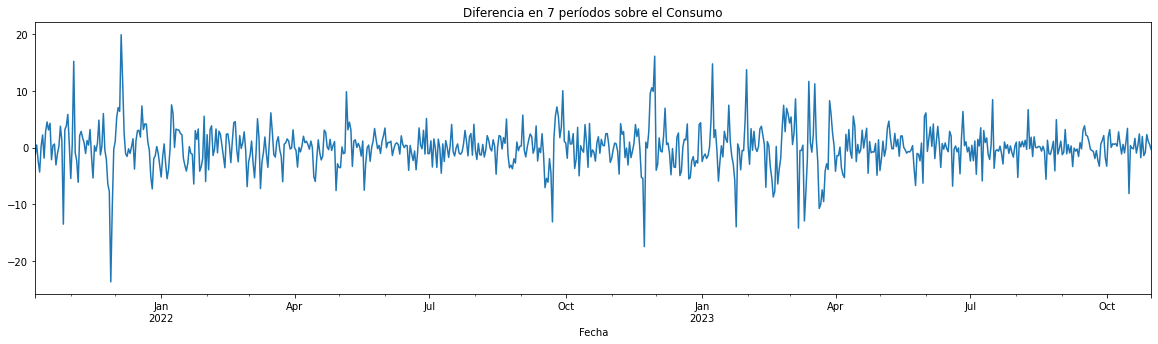

In [57]:
#grafico este indice con las diferencias aplicadas fila a fila
df_consumo_diff_7.Consumo.plot(figsize=(20,5), title = "Diferencia en 7 períodos sobre el Consumo")
plt.show()

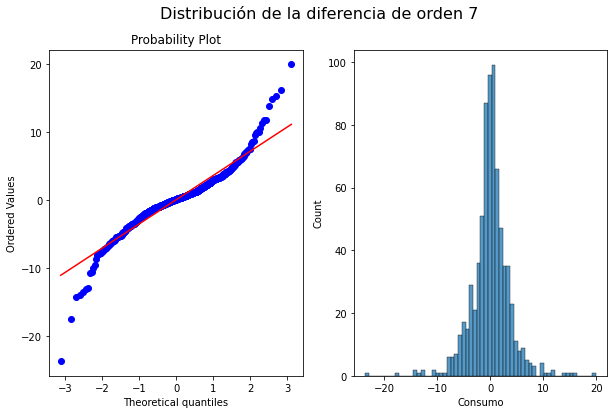

In [58]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle("Distribución de la diferencia de orden 7", size = 16)


sns.histplot(data = df_consumo_diff_7, x = 'Consumo', ax = axs[1]);
scipy.stats.probplot(df_consumo_diff_7.Consumo, plot = axs[0], fit=True, dist='norm');

La variable se distribuya de forma más simétrica pero con mayor varianza, esto se puede ver en las colas pesadas del QQ plot.
Se continúa con la descomposición de la serie.

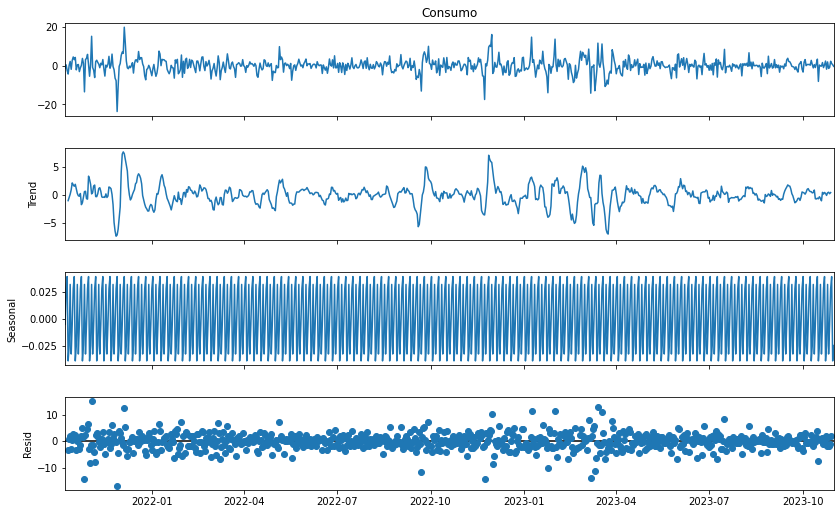

In [59]:
s_dec_additive_7 = seasonal_decompose(df_consumo_diff_7.Consumo, model = "adittive")
fig = s_dec_additive_7.plot()
fig.set_size_inches(12,8)
plt.show()

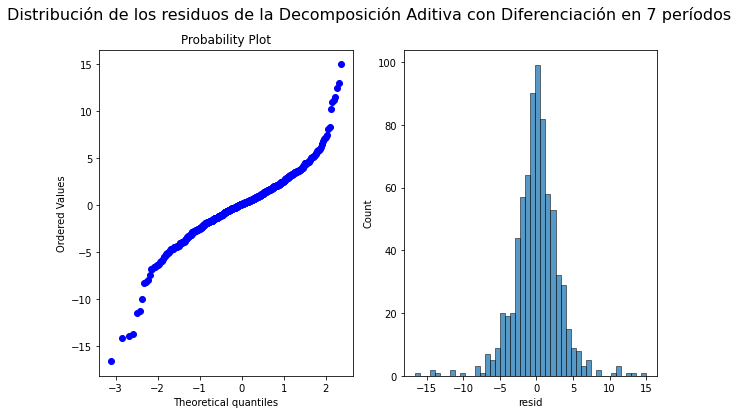

In [60]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle("Distribución de los residuos de la Decomposición Aditiva con Diferenciación en 7 períodos", size = 16)


sns.histplot(data = s_dec_additive_7, x=s_dec_additive_7.resid, ax = axs[1]);
scipy.stats.probplot(s_dec_additive_7.resid, plot = axs[0], fit=True, dist='norm');

In [61]:
s_dec_additive_7.resid.describe()

count    748.000000
mean      -0.000538
std        3.100091
min      -16.602529
25%       -1.564229
50%        0.067207
75%        1.587085
max       14.950790
Name: resid, dtype: float64

La serie continúa presentando estacionalidad.
Los residuos de la descomposición aditiva tienen media 0 y des distribuyen simétricamente, aunque con una mayor varianza.
A continuación se analiza la descomposición de la serie con descomposición multiplicativa.

In [62]:
#s_dec_multiplicative_7 = seasonal_decompose(df_consumo_diff_7.Consumo, model = "multiplicative")
#s_dec_multiplicative_7.plot()
#plt.show()

Se realizarán los test estadísticos para determinar si la serie con la diferenciación en 7 períodos es estacionaria o no.

In [63]:
print_test_afd(df_consumo_diff_7.Consumo)

Estadistico ADF: -10.031623
p-valor: 0.000000
Valores criticos:
	1%: -3.439
	5%: -2.865
	10%: -2.569


El test estadístico indica que la serie es estacionaria. Ahora veremos las gráficas AFS, AFC y PAFC.

In [64]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 , titulo_1 = 'Serie: Consumo', titulo_2 = 'Primera Derivada Consumo'):
  p1, axes=plt.subplots(3,2,figsize=(18,10),sharex=True, sharey=False )
  axes[2,0].set_xlabel('Lag')
  axes[2,1].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title=titulo_1)
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')

  plot_acf(serie_nr, lags=nrol, ax= axes[0,1], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title=titulo_2)
  plot_pacf(serie_nr, lags=nrol, ax= axes[1,1], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,1].plot(tsa.acovf(serie_nr,fft=False, nlag=nrol), color='r', label='AutoCov')

  p1.legend()
  plt.show()

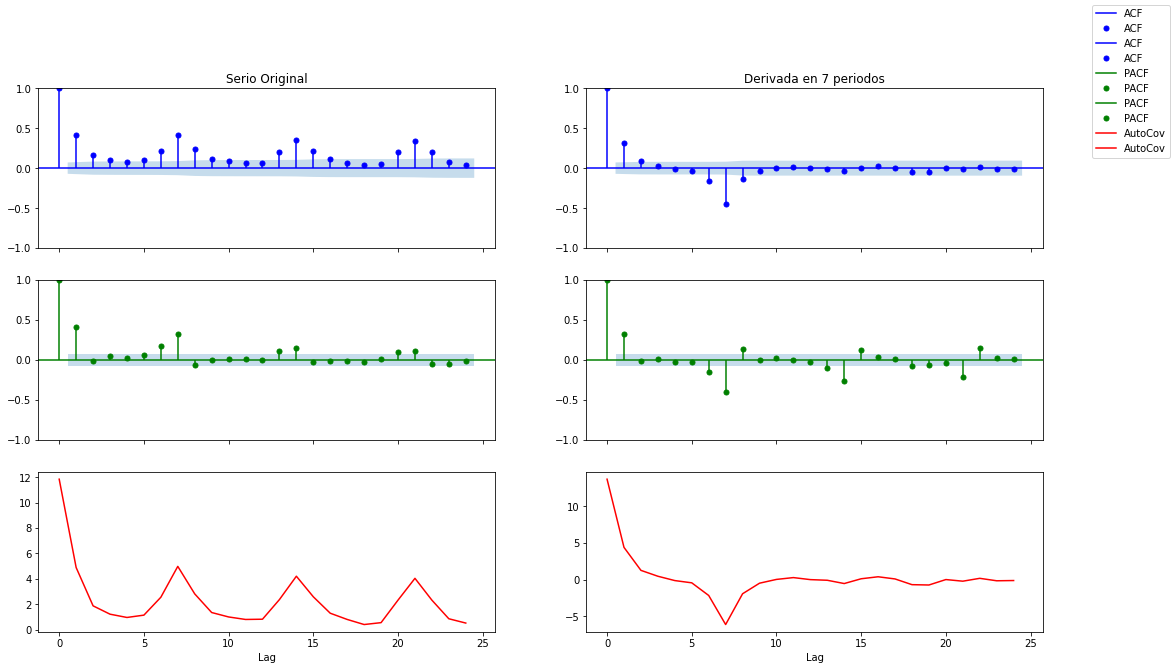

In [65]:
autocov_autocorr(df_consumo.Consumo,df_consumo_diff_7.Consumo,24 , "Serio Original", "Derivada en 7 periodos")

Se puede observar que el comportamiento de la serie con diferenciación de 7 períodos es mejor que la serie original. Aún diferenciando la serie no se consigue que la serie sea estacionaria.

Se realizarán los test estadísticos para asegurarse la estacionariedad.

In [66]:
print_test_afd(df_consumo_diff_7.Consumo)

Estadistico ADF: -10.031623
p-valor: 0.000000
Valores criticos:
	1%: -3.439
	5%: -2.865
	10%: -2.569


Según el análisis de las gráficas AFS, AFC y PAFC, se llega a la conclusión que la serie con diferenciación de 7 períodos no es estacionaria, aunque el test estadístico haya indicado que si lo es. Por lo tanto no se espera tener buenos resultados con un modelo en donde no se tenga en cuenta la estacionalidad.

Se volverá a diferencia la serie para evaluar si se consigue la estacionareidad

In [67]:
df_consumo_diff_7_2 = df_consumo_diff_7.copy()
df_consumo_diff_7_2 = df_consumo_diff_7_2 - df_consumo_diff_7_2.shift(7)
df_consumo_diff_7_2 = df_consumo_diff_7_2.dropna()
df_consumo_diff_7_2.head(10)

,Consumo
Fecha,
2021-10-15,4.005641
2021-10-16,4.064901
2021-10-17,5.487839
2021-10-18,8.583670
2021-10-19,-2.380692
2021-10-20,-1.844118
2021-10-21,2.488779
2021-10-22,-5.807460
2021-10-23,-5.608909


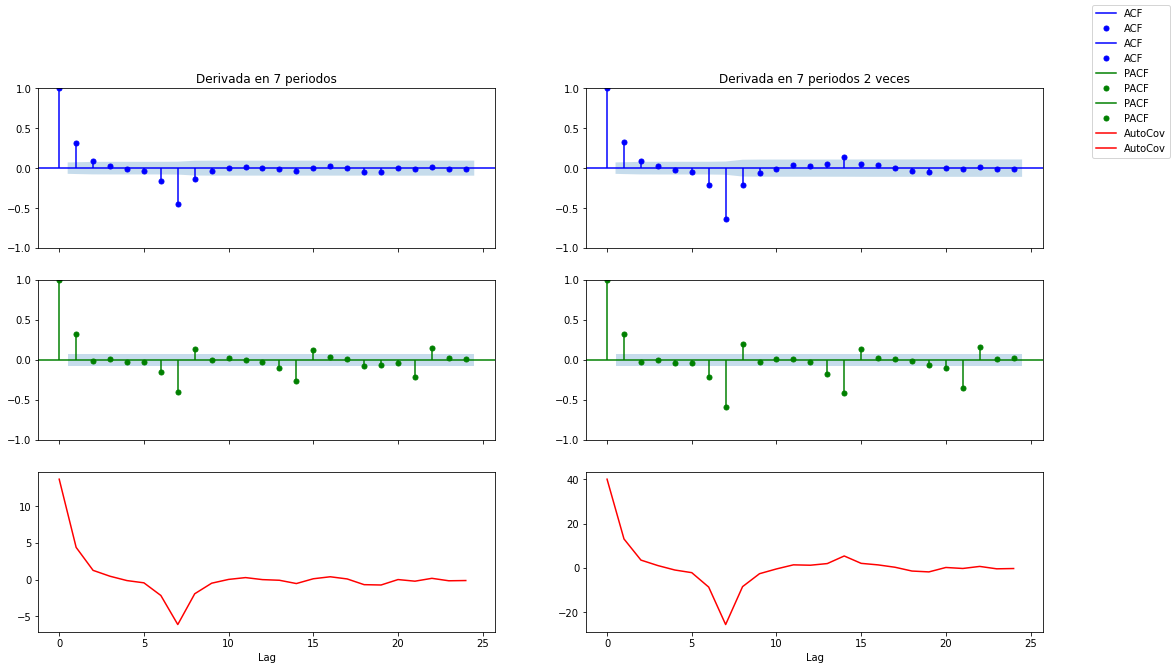

In [68]:
autocov_autocorr(df_consumo_diff_7.Consumo,df_consumo_diff_7_2.Consumo,24 , "Derivada en 7 periodos", "Derivada en 7 periodos 2 veces")

In [69]:
print_test_afd(df_consumo_diff_7_2.Consumo)

Estadistico ADF: -13.438453
p-valor: 0.000000
Valores criticos:
	1%: -3.439
	5%: -2.866
	10%: -2.569


Aún derivando por segunda vez la serie en el período estacionario, no se consigue la estacionareidad. La serie presenta el mismo comportamiento que para la primera derivada.

A continuación se harán 2 modelos con AutoARIMA, uno considerando la estacionalidad y otro sin estacionalidad y se compararán resultados.

## Modelos Predictivos

Se compararán 2 modelos predictivos del tipo ARIMA, uno será con modelo estacional y otro sin estacionalidad. Se utilziarán en ambos casos la función AutoARIMA para encontrar los parámetros óptimos de los modelos.

### SARIMA

### AutoARIMA con estacionalidad

Como se analizó anteriormente la serie de consumo tiene estacionalidad de 7 períodos.

In [70]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

Se divide la serie entre train y test, utilizando un 80% para el trainning y 20% para el testing.

In [71]:
# Separacion Train/Test
# Seleccionamos el primer 80% para train
train = df_consumo.Consumo.iloc[:round(len(df_consumo.Consumo)*.80)]

# Seleccionamos el 20% restante para test
test = df_consumo.Consumo.iloc[round(len(df_consumo.Consumo)*.80):]

cant_test = len(df_consumo.Consumo) - round(len(df_consumo.Consumo)*.80)

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train, test)

Fecha
2021-10-01    45.201497
2021-10-02    39.899719
2021-10-03    39.705724
2021-10-04    45.777167
2021-10-05    46.147136
                ...    
2023-05-28    39.239511
2023-05-29    46.262122
2023-05-30    39.894626
2023-05-31    48.007113
2023-06-01    45.936407
Freq: D, Name: Consumo, Length: 609, dtype: float64 Fecha
2023-06-02    43.199055
2023-06-03    44.204110
2023-06-04    42.891846
2023-06-05    46.488384
2023-06-06    44.061988
                ...    
2023-10-27    46.582215
2023-10-28    46.426496
2023-10-29    45.175833
2023-10-30    43.797751
2023-10-31    44.892422
Freq: D, Name: Consumo, Length: 152, dtype: float64


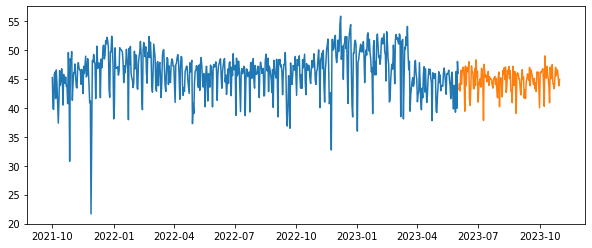

In [72]:
# Visualización Train - Test

plt.plot(train)
plt.plot(test)

Primero se analizará un modelo SARIMA y se dejará que la función AutoARIMA elija de forma automática los parámetros del modelo.

In [73]:
auto_arima(train, start_p=0, max_p=7, start_d = 0, max_d = 5, start_D = 0,max_D=5, start_q=0, max_q=7,
           start_P=0, max_P=7, start_Q=0, max_Q=7,
           seasonal=True, m=7, trace=True, stepwise=True, maxiter = 100 ).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3397.562, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3272.947, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3190.494, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3395.563, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=3228.655, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=3178.193, Time=0.36 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=3.26 sec
 ARIMA(0,1,1)(0,0,3)[7] intercept   : AIC=3170.735, Time=1.77 sec
 ARIMA(0,1,1)(1,0,3)[7] intercept   : AIC=inf, Time=8.90 sec
 ARIMA(0,1,1)(0,0,4)[7] intercept   : AIC=3165.718, Time=2.81 sec
 ARIMA(0,1,1)(1,0,4)[7] intercept   : AIC=inf, Time=13.19 sec
 ARIMA(0,1,1)(0,0,5)[7] intercept   : AIC=3162.786, Time=4.75 sec
 ARIMA(0,1,1)(1,0,5)[7] intercept   : AIC=inf, Time=19.88 sec
 ARIMA(0,1,1)(0,0,6)[7] intercept   : AIC=3153.625, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:                                            y   No. Observations:                  609
Model:             SARIMAX(1, 1, 3)x(1, 0, [1, 2, 3, 4], 7)   Log Likelihood               -1495.149
Date:                                      Wed, 06 Dec 2023   AIC                           3012.298
Time:                                              07:23:26   BIC                           3060.810
Sample:                                          10-01-2021   HQIC                          3031.171
                                               - 06-01-2023                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.959e-05      0.000      0.115      0.908      -0.001       0.001
ar.L1         -0.1298      0.417     -0.311      0.756      -0.947       0.688
ma.L1         -0.4766      0.416     -1.144      0.252      -1.293       0.340
ma.L2         -0.3005      0.262     -1.148      0.251      -0.813       0.212
ma.L3         -0.1155      0.113     -1.025      0.305      -0.337       0.105
ar.S.L7        0.9943      0.005    216.841      0.000       0.985       1.003
ma.S.L7       -0.9322      0.053    -17.528      0.000      -1.036      -0.828
ma.S.L14      -0.0851      0.062     -1.367      0.172      -0.207       0.037
ma.S.L21       0.0189      0.051      0.373      0.709      -0.081       0.119
ma.S.L28       0.0567      0.043      1.311      0.190      -0.028       0.142
sigma2         7.9024      0.281     28.148      0.000       7.352       8.453
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              1360.29
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -1.48
Prob(H) (two-sided):                  0.12   Kurtosis:                         9.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
modelo_sarima_inicial = SARIMAX(train, order=(1,1,3), seasonal_order=(1, 0, 4, 7),trend='c')
modelo_sarima_inicial = modelo_sarima_inicial.fit()
print(modelo_sarima_inicial.summary())

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                          SARIMAX Results                                           
Dep. Variable:                                      Consumo   No. Observations:                  609
Model:             SARIMAX(1, 1, 3)x(1, 0, [1, 2, 3, 4], 7)   Log Likelihood               -1498.249
Date:                                      Wed, 06 Dec 2023   AIC                           3018.499
Time:                                              07:54:01   BIC                           3067.011
Sample:                                          10-01-2021   HQIC                          3037.372
                                               - 06-01-2023                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.102e-05      0.000  

El modelor presenta muchos parámetros que no son estadísticamente significativos. Además llama la atención que realice una derivación del modelo por fuera del período estacional, esto nos damos cuenta porque el parámetro d = 1, y no se realizan derivadas en el período estacional, D = 0.

Sorprende que se haga una derivada por fuera del período estacional, se analizarán las gráficas ACF, PACF y AFS.

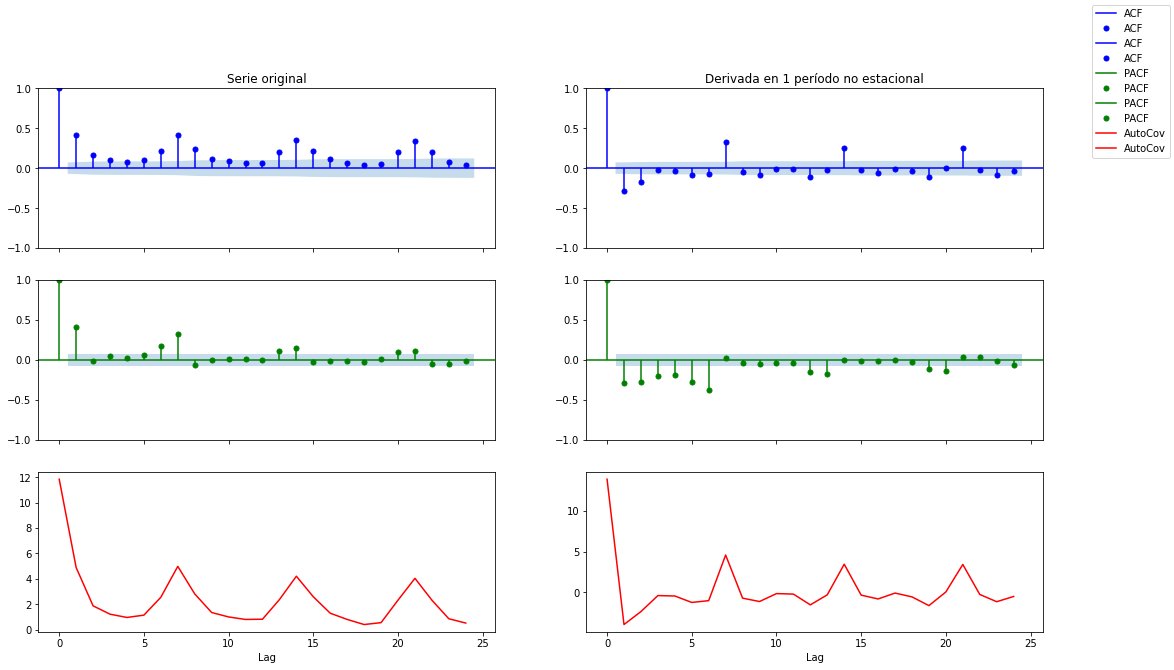

In [97]:
df_consumo_diff = df_consumo.copy()
df_consumo_diff = df_consumo_diff - df_consumo_diff.shift(1)
df_consumo_diff = df_consumo_diff.dropna()

autocov_autocorr(df_consumo.Consumo,df_consumo_diff.Consumo,24 , "Serie original", "Derivada en 1 período no estacional")

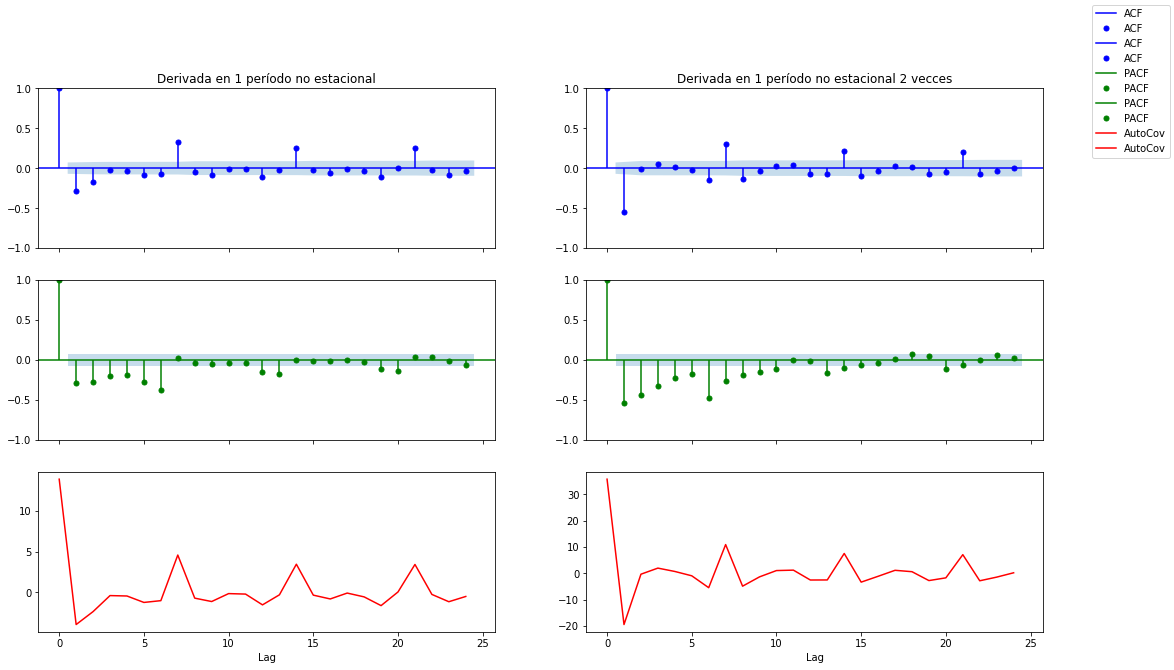

In [99]:
df_consumo_diff_2 = df_consumo_diff.copy()
df_consumo_diff_2 = df_consumo_diff_2 - df_consumo_diff_2.shift(1)
df_consumo_diff_2 = df_consumo_diff_2.dropna()

autocov_autocorr(df_consumo_diff.Consumo,df_consumo_diff_2.Consumo,24 , "Derivada en 1 período no estacional", "Derivada en 1 período no estacional 2 vecces")

La serie no alcanza la estacionareidad derivando 1 vez fuera del período estacional. Los valores negativos en la PACF de la serie derivada tanto dentro de la estacionalidad como fuera de la estacionalidad, explican la cantidad de parámetros MA que tiene el modelo. No parece mejorar el comportamiento de la serie con una derivación no estacional y empeora al realizar 2 derivaciones. Se analizará a continuación el modelo.

In [76]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Consumo"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [79]:
print(f"Los criterios de informacion que arroja el modelo son \n -Akaike= {modelo_sarima_inicial.aic} \n -Bayesiano= {modelo_sarima_inicial.bic} \n -Hannan-Quinn {modelo_sarima_inicial.hqic}")

Los criterios de informacion que arroja el modelo son 
 -Akaike= 3018.498694196477 
 -Bayesiano= 3067.010617898105 
 -Hannan-Quinn 3037.372198367723


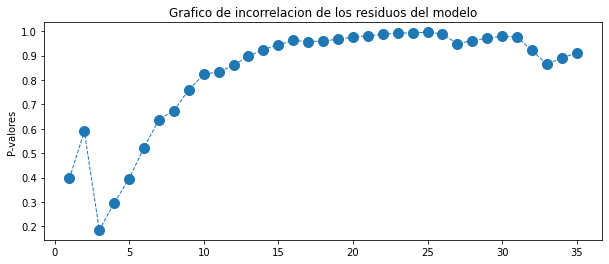

In [80]:
Incorr_residuos_sarima = sm.stats.acorr_ljungbox(modelo_sarima_inicial.resid, lags=35);
plt.plot(Incorr_residuos_sarima.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1);
plt.title("Grafico de incorrelacion de los residuos del modelo");
plt.ylabel("P-valores");
#plt.ylim(0,0.1);

Como se puede ver en el test Ljung Box, todos los residuos están incorrelacionados.

In [82]:
print(f" La media de los residuos del modelo es=  {modelo_sarima_inicial.resid.mean()}")

 La media de los residuos del modelo es=  0.00885442244818214


In [83]:
print(f" La varianza de los residuos del modelo es=  {modelo_sarima_inicial.resid.var()}")

 La varianza de los residuos del modelo es=  11.49984948377661


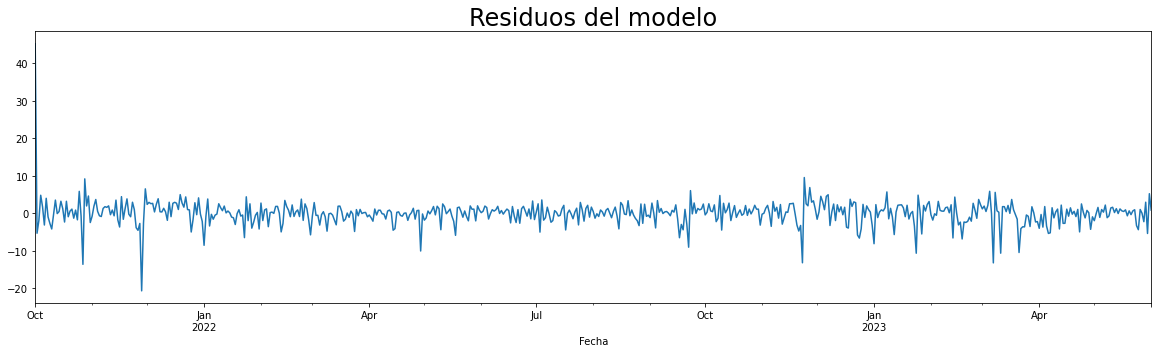

In [85]:
modelo_sarima_inicial.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()

In [88]:
modelo_sarima_inicial.resid.head(10)

Fecha
2021-10-01    45.204530
2021-10-02    -5.298549
2021-10-03    -1.905174
2021-10-04     4.826426
2021-10-05     1.752616
2021-10-06    -3.104588
2021-10-07     4.013278
2021-10-08    -0.936679
2021-10-09    -2.679736
2021-10-10    -4.160448
Freq: D, dtype: float64

El modelo predice mal el primer valor y luego mejora a medida que avanza en los valores estacionales. En los veranos al haber temperaturas muy elevadas y el consumo aumentó mucho por el uso del aire acondicionado, esto genera una mayor varianza en los valores de consumo, es por esto que el modelo predice peor en estas fechas.

A continuación, se muestran algunas gráficas de distribución de los residuos.

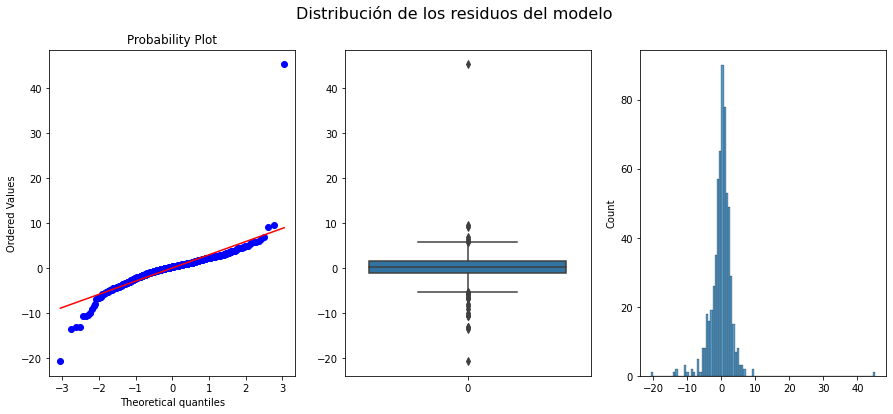

In [84]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15,6)
plt.suptitle("Distribución de los residuos del modelo", size = 16)


sns.histplot(data = modelo_sarima_inicial.resid, ax = axs[2]);
scipy.stats.probplot(modelo_sarima_inicial.resid, plot = axs[0], fit=True, dist='norm');
sns.boxplot( data = modelo_sarima_inicial.resid, ax = axs[1]);

Se pueden apreciar algunos outliers que ocurren en el comienzo del modelo, el superior de 45 es el primer residuo del modelo. A su vez el QQ plot tiene una cola inferior pesada ya que los mínimos de consumo ocurren en días feriados cuando el tránsito es menor, estas observaciones son exógeneas y el modelo no logra predecirlas correctamente.

In [91]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

Se realizan algunas predicciones con un corte de 80% para el train y 20% para el test.

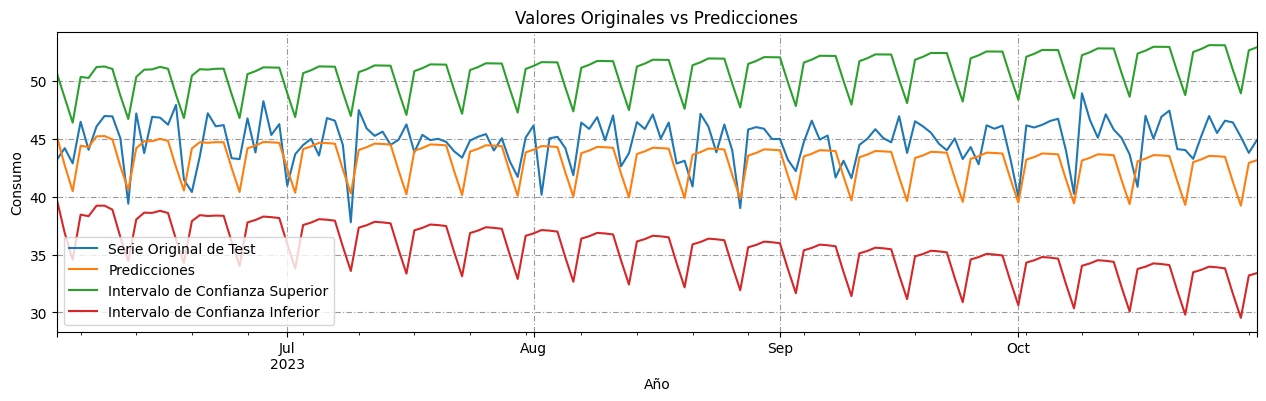

In [94]:
predicciones_sarima = modelo_sarima_inicial.get_forecast(cant_test)

# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test, predicciones_sarima.predicted_mean, predicciones_sarima.conf_int())

Se puede apreciar que la predicción no es del todo buena. Se muestran a continuación algunas gráficas de los residuos.

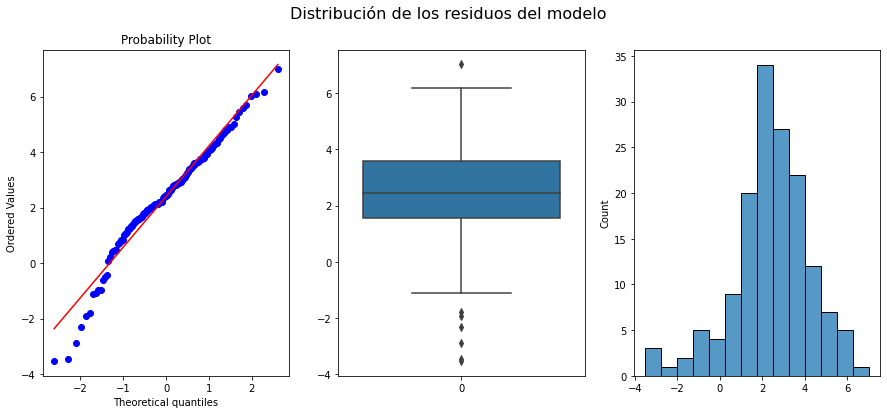

In [89]:
error_sarima_inicial = test - predicciones_sarima.predicted_mean
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15,6)
plt.suptitle("Distribución de los residuos del modelo", size = 16)


sns.histplot(data = error_sarima_inicial, ax = axs[2]);
scipy.stats.probplot(error_sarima_inicial, plot = axs[0], fit=True, dist='norm');
sns.boxplot( data = error_sarima_inicial, ax = axs[1]);

In [92]:
evaluar_metricas(test, predicciones_sarima.predicted_mean)

MSE: 9.113568805850859
MAE: 2.6834380284071893
RMSE: 3.0188687957330735
MAPE: 0.0593


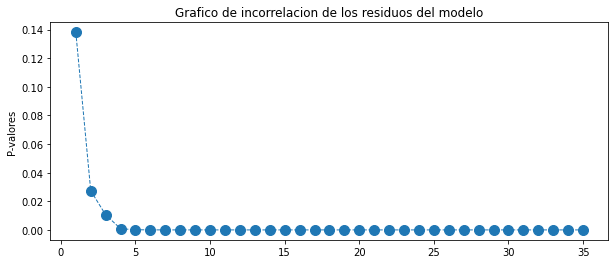

In [90]:
Incorr_residuos_sarima = sm.stats.acorr_ljungbox(error_sarima_inicial, lags=35);
plt.plot(Incorr_residuos_sarima.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1);
plt.title("Grafico de incorrelacion de los residuos de las prediciones del modelo");
plt.ylabel("P-valores");
#plt.ylim(0,0.1);

Como se puede ver a anteriormente, las predicciones presentan un fuerte sesgo ya que su media no es 0 y los residuos se encuentran correlacionados según el test de Ljung Box.

Se itentará corregir esto a continuación y se probará no diferenciando la serie.

Utilizando los análisis realizados sobre la serie se realizarán los siguientes ajustes sobre los parámetros del AutoArima:

Se setea el parámetro m = 7, ya que la serie tiene valores diarios con una estacionalidad por semana como se vio en las gráficas anteriores.

Como se vió en las gráficas de ACF, PCAF y AFS, la diferenciación en un período estacional no genera estacionareidad (ni 1 o 2 diferencias), por lo que seteará el parámetro D = 0.

Como no hay que realizar una diferenciación fuera del período estacional el parámetro d se setea igual a 0, d = 0.

Se consultó la siguiente documentación:

https://alkaline-ml.com/pmdarima/tips_and_tricks.html

https://people.duke.edu/~rnau/seasarim.htm#outline

In [98]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA

#auto_arima(train, start_p=0, max_p=5, d = 0, start_q=0, max_q=5,
#           start_P=0, max_P=5, D=0, start_Q=0, max_Q=5,
#           seasonal=True, m=7, trace=True, stepwise=True, maxiter = 100 ).summary()
#
auto_arima(train, start_p=0, max_p=7, d = 0, D = 0, start_q=0, max_q=7,
           start_P=0, max_P=7, start_Q=0, max_Q=7,
           seasonal=True, m=7, trace=True, stepwise=True, maxiter = 100 ).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3313.141, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3107.783, Time=0.49 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3140.198, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6405.702, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=3196.357, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=3090.866, Time=2.48 sec
 ARIMA(1,0,0)(3,0,0)[7] intercept   : AIC=3077.129, Time=2.83 sec
 ARIMA(1,0,0)(4,0,0)[7] intercept   : AIC=3065.004, Time=6.65 sec
 ARIMA(1,0,0)(5,0,0)[7] intercept   : AIC=3119.263, Time=15.38 sec
 ARIMA(1,0,0)(4,0,1)[7] intercept   : AIC=inf, Time=4.45 sec
 ARIMA(1,0,0)(3,0,1)[7] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(1,0,0)(5,0,1)[7] intercept   : AIC=3471.110, Time=22.88 sec
 ARIMA(0,0,0)(4,0,0)[7] intercept   : AIC=3154.652, Time=9.06 sec
 ARIMA(2,0,0)(4,0,0)[7] intercept   : AIC=inf, Time=3.76 sec
 ARIMA(1,0,1)(4,0,0)[7] intercept   : AIC=3156

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  609
Model:             SARIMAX(1, 0, 0)x(4, 0, 0, 7)   Log Likelihood               -1525.502
Date:                           Wed, 06 Dec 2023   AIC                           3065.004
Time:                                   08:33:35   BIC                           3095.887
Sample:                               10-01-2021   HQIC                          3077.018
                                    - 06-01-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.3022      1.478      6.973      0.000       7.406      13.198
ar.L1          0.3752      0.028     13.459      0.000       0.321       0.430
ar.S.L7        0.2595      0.040      6.557      0.000       0.182       0.337
ar.S.L14       0.1084      0.039      2.760      0.006       0.031       0.185
ar.S.L21       0.1180      0.033      3.553      0.000       0.053       0.183
ar.S.L28       0.1564      0.042      3.708      0.000       0.074       0.239
sigma2         8.7333      0.306     28.531      0.000       8.133       9.333
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1063.46
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -1.26
Prob(H) (two-sided):                  0.06   Kurtosis:                         8.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Todos los pvalor de los coeficientes arrojados por el AutoARIMA son menores a 0.05, por lo que se incluirán todos en el análisis.

Como el AutoARIMA no recomienda incluir un parámetro de intercepto se le pasa a la función SARIMAX el argumento ***trend = 'n'***.

In [102]:
modelo_sarima = SARIMAX(train, order=(1,0,0), seasonal_order=(4, 0, 0, 7),trend='c')
modelo_sarima = modelo_sarima.fit()
print(modelo_sarima.summary())

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                           Consumo   No. Observations:                  609
Model:             SARIMAX(1, 0, 0)x(4, 0, 0, 7)   Log Likelihood               -1549.576
Date:                           Wed, 06 Dec 2023   AIC                           3113.152
Time:                                   08:39:55   BIC                           3144.035
Sample:                               10-01-2021   HQIC                          3125.166
                                    - 06-01-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9023      0.717      1.259      0.208      -0.503       2.307
ar.L1          0.4049      0.029     14.168

En el summary de la función SARIMAX se puede comprobar que todos los parámetros del modelo son estadísticamente significativos, salvo el intercepto, en el AutoARIMA esto no sucedía, por lo que se dejará el intercepto.

El modelo cuenta con 4 parámetros RA de los errores de las prediciones estacionales anteriores, es decir los valores de 7 y 14, 21 y 28 días atrás, y un parámetro RA de los errores de las prediciones anteriores por fuera de la estacionalidad.

Este es un modelo más simple que el anterior. A partir de las gráficas de ACF y PACF se puede observar el primer lag no estacional positivo y luego los lags positivos en las gráficas explican que todos los parámetros sean AR.

In [103]:
print(f"Los parametros que arroja el modelo son= \n {modelo_sarima.params} ")

Los parametros que arroja el modelo son= 
 intercept    0.902272
ar.L1        0.404947
ar.S.L7      0.327461
ar.S.L14     0.181072
ar.S.L21     0.199739
ar.S.L28     0.255424
sigma2       9.406924
dtype: float64 


In [104]:
print(f"Los criterios de informacion que arroja el modelo son \n -Akaike= {modelo_sarima.aic} \n -Bayesiano= {modelo_sarima.bic} \n -Hannan-Quinn {modelo_sarima.hqic}")

Los criterios de informacion que arroja el modelo son 
 -Akaike= 3113.1524846680777 
 -Bayesiano= 3144.035212542047 
 -Hannan-Quinn 3125.1664851535234


In [105]:
print(f" La media de los residuos del modelo es=  {modelo_sarima.resid.mean()}")

 La media de los residuos del modelo es=  0.1211506796547794


In [106]:
print(f" La varianza de los residuos del modelo es=  {modelo_sarima.resid.var()}")

 La varianza de los residuos del modelo es=  9.385233573712382


La media de los residuos se encuentra muy cercana a 0, aunque los residuos presentan una gran varianza.

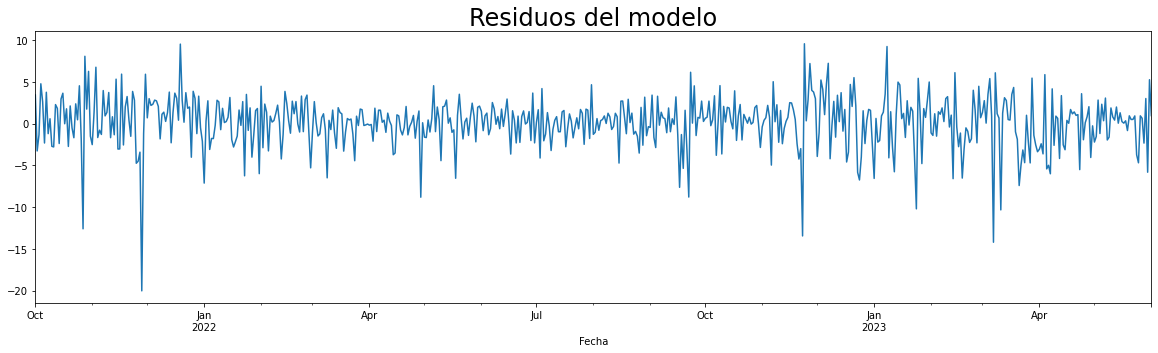

In [107]:
modelo_sarima.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()

In [108]:
modelo_sarima.resid.head(10)

Fecha
2021-10-01    3.435539
2021-10-02   -3.268617
2021-10-03   -1.332179
2021-10-04    4.776901
2021-10-05    2.593023
2021-10-06   -2.317076
2021-10-07    3.761971
2021-10-08   -1.196505
2021-10-09    0.588105
2021-10-10   -2.712387
Freq: D, dtype: float64

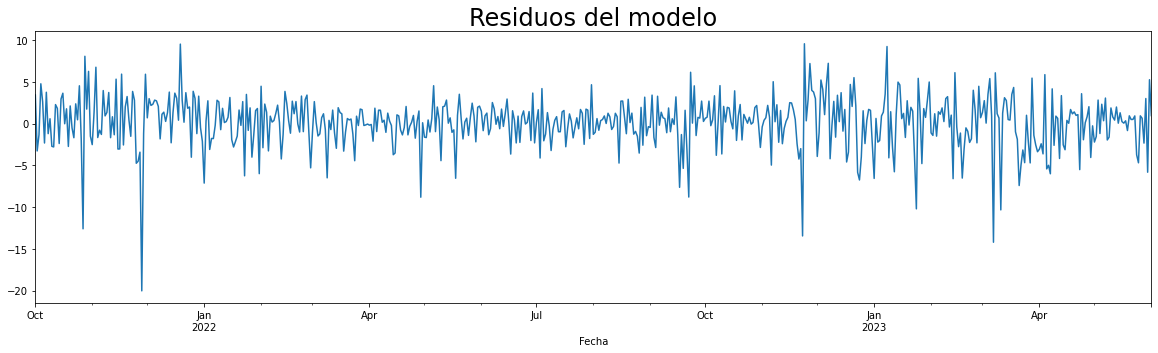

In [110]:
modelo_sarima.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)

plt.show()

Se realiza a continuación la prueba Ljung-Box para evaluar la incorrelación de los residuos.

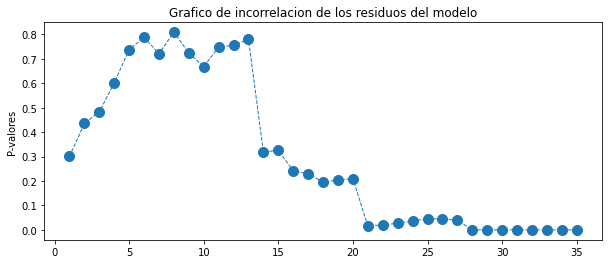

In [111]:
Incorr_residuos_sarima = sm.stats.acorr_ljungbox(modelo_sarima.resid, lags=35);
plt.plot(Incorr_residuos_sarima.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1);
plt.title("Grafico de incorrelacion de los residuos del modelo");
plt.ylabel("P-valores");
#plt.ylim(0,0.1);

El modelo tiene residuos incorrelacionados hasta el lag 21, es probable que agregando mayor cantidad de parámetros estacionales esto se elimine, aunque se aumente la complejidad del modelo.

Se le agregará un parámetro AR estacional al modelo anterior y se analiza la distribución de los residuos de esta prueba.

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


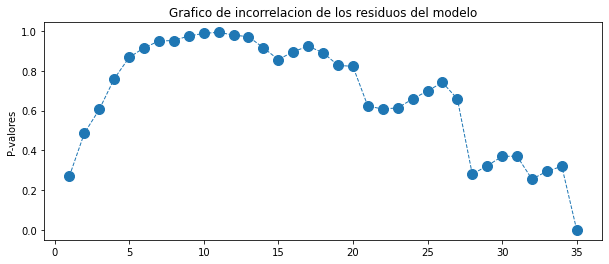

In [114]:
modelo_sarima_prueba = SARIMAX(train, order=(1,0,0), seasonal_order=(5, 0, 0, 7),trend='c')
modelo_sarima_prueba = modelo_sarima_prueba.fit()
Incorr_residuos_sarima_prueba = sm.stats.acorr_ljungbox(modelo_sarima_prueba.resid, lags=35);
plt.plot(Incorr_residuos_sarima_prueba.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1);
plt.title("Grafico de incorrelacion de los residuos del modelo");
plt.ylabel("P-valores");

Como se puede ver en el gráfico anterior se mejoró la incorrelación de los residuos, pero hasta el lag 35. Es posible que si se aumenta la cantidad de lags en el gráfico haya residuos correlacionados y se puede uno a tentar agregar más parámetros.

Se compararán los 2 modelos, uno con 4 parámetros AR estacionales y el otro con 5 parámetros.

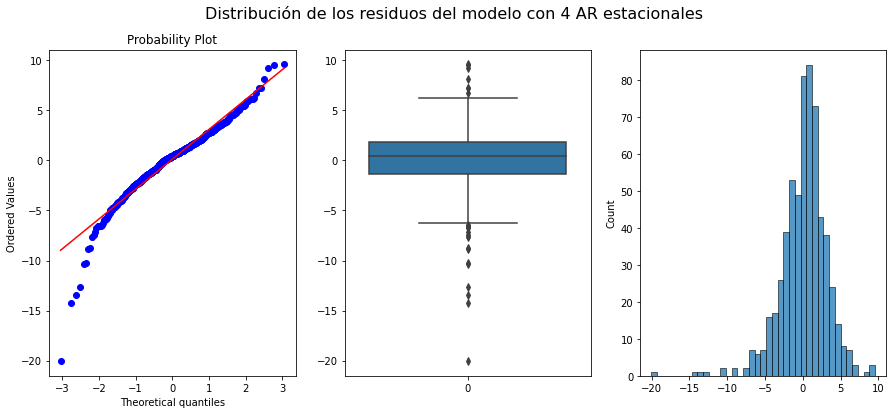

In [116]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15,6)
plt.suptitle("Distribución de los residuos del modelo con 4 AR estacionales", size = 16)


sns.histplot(data = modelo_sarima.resid, ax = axs[2]);
scipy.stats.probplot(modelo_sarima.resid, plot = axs[0], fit=True, dist='norm');
sns.boxplot( data = modelo_sarima.resid, ax = axs[1]);


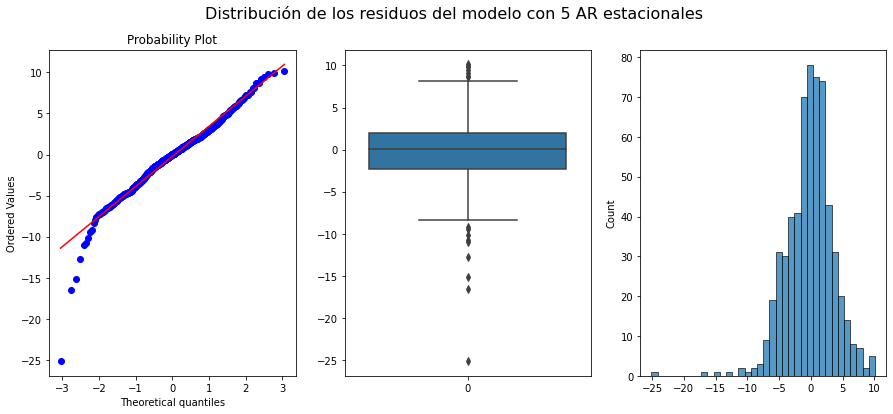

In [115]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15,6)
plt.suptitle("Distribución de los residuos del modelo con 5 AR estacionales", size = 16)


sns.histplot(data = modelo_sarima_prueba.resid, ax = axs[2]);
scipy.stats.probplot(modelo_sarima_prueba.resid, plot = axs[0], fit=True, dist='norm');
sns.boxplot( data = modelo_sarima_prueba.resid, ax = axs[1]);

Los 2 modelos se comportant muy similar en cuanto a la distribución de los residuos. El modelo con 4 parámetros parece tener menor varianza en los residuos. El modelo con 5 parámetros predice mejor los picos de consumo, esto se puede ver en la cola superior del QQ plot.

Se puede ver que en ambos QQ plot presentan una cola inferior pesada, lo que demuestra lo antes indicado, los modelos predicen mal los mínimos de consumo ya que se deben a causas exógenas.

Se analizarán las métricas de los modelos.

In [117]:
datos = {'Modelos': ['SARIMA 4 parámetros','SARIMA 5 parámetros'],
         'AIC': [modelo_sarima.aic, modelo_sarima_prueba.aic],
         'BIC': [modelo_sarima.bic, modelo_sarima_prueba.bic],
         'MAE': [modelo_sarima.mae, modelo_sarima_prueba.mae],
         'MSE': [modelo_sarima.mse, modelo_sarima_prueba.mse]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

,Modelos,AIC,BIC,MAE,MSE
0,SARIMA 4 parámetros,3113.152485,3144.035213,2.234265,9.384500
1,SARIMA 5 parámetros,3371.091652,3406.386198,2.765554,13.865868


In [123]:
datos = {'Modelos': ['SARIMA 4 parámetros','SARIMA 5 parámetros'],
         'Media': [np.mean(modelo_sarima.resid), np.mean(modelo_sarima_prueba.resid)],
         'Varianza': [np.var(modelo_sarima.resid), np.var(modelo_sarima_prueba.resid)]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

,Modelos,Media,Varianza
0,SARIMA 4 parámetros,0.121151,9.369823
1,SARIMA 5 parámetros,-0.217333,13.818634


El modelo SARIMA con 5 parámetros presenta peores resultados. Se analizarán las predicciones de ambos modelos para corroborar sus desempeños.

### Predicciones SARIMA

Se puede ver que el QQ plot presenta una cola inferior pesada, lo que demuestra lo antes indicado, el modelo predice mal los mínimos de consumo ya que se deben a causas exógenas.

#### SARIMA con 4 parámetros AR estacionales

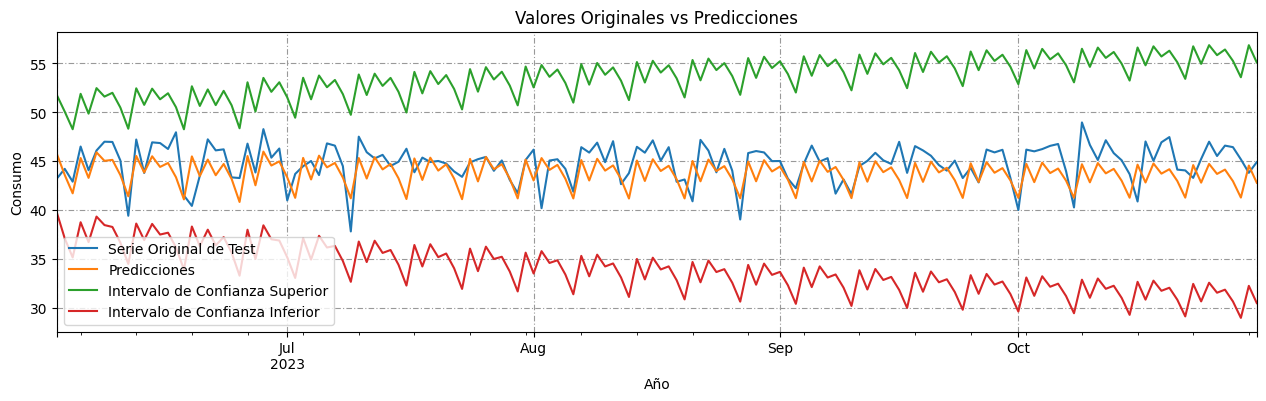

In [125]:
predicciones_sarima = modelo_sarima.get_forecast(cant_test)


# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test, predicciones_sarima.predicted_mean, predicciones_sarima.conf_int())

#### SARIMA con 5 parámetros AR estacionales

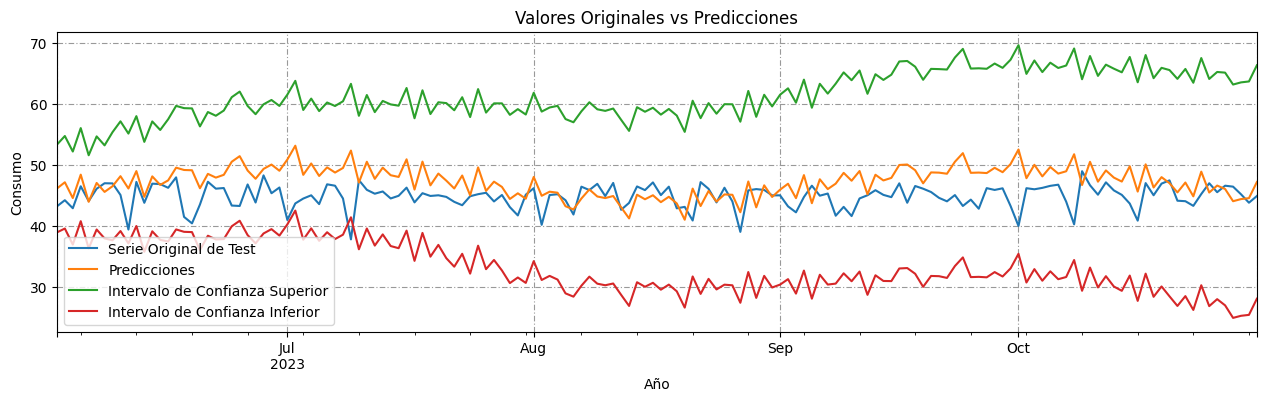

In [124]:
predicciones_sarima_prueba = modelo_sarima_prueba.get_forecast(cant_test)


# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test, predicciones_sarima_prueba.predicted_mean, predicciones_sarima_prueba.conf_int())

El modelo con 5 parámetros estacionales predice peor que el modelo que tiene 4. Por lo tanto se descartará el modelo con 5 parámetros, aunque este tenga residuos menos correlacionados.

El modelo con 4 parámetros parece ajustar bastante bien a los datos originales, a continuación se analizarán los residuos de este modelo. Es importante destacar que los valles de la serie son difíciles de predecir ya que generalmente corresponden a días feriados que no son tenidos en cuenta en el modelo. En los días feriados hay un menor consumo debido a que hay menor transito y menor cantidad de pasajeros, lo que genera que los colectivos tengan que parar y acelerar menor cantidad de veces.

In [127]:
#error_relativo_sarima = (test[:cant_test] - predicciones_sarima.predicted_mean) / test[:cant_test] * 100
# Se retiran de los errores de los valores nulos en serie original.
# Estos valores son imposibles de predecir.
#error_relativo_sarima = error_relativo_sarima[error_relativo_sarima >-40]*100
error_sarima = test - predicciones_sarima.predicted_mean

<AxesSubplot:xlabel='Fecha'>

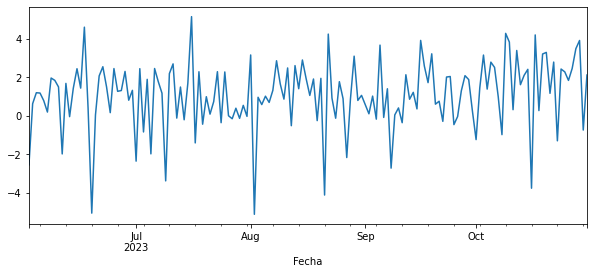

In [128]:
error_sarima.plot()

In [129]:
print('La media del error absoluto de las predicciones es =',round(np.mean(error_sarima),2))
print('El valor máximo del error absoluto de las predicciones es =',round(np.max(error_sarima),2))
print('El valor mínimo del error absoluto de las predicciones es =',round(np.min(error_sarima),2))
print('La varianza del error de las predicciones es =',round(np.var(error_sarima),2))


La media del error absoluto de las predicciones es = 1.08
El valor máximo del error absoluto de las predicciones es = 5.15
El valor mínimo del error absoluto de las predicciones es = -5.13
La varianza del error de las predicciones es = 3.14


In [130]:
#Evaluamos las métricas del modelo
evaluar_metricas(test[:cant_test], predicciones_sarima.predicted_mean )

MSE: 4.310381134652334
MAE: 1.6826917570240698
RMSE: 2.0761457402244994
MAPE: 0.0375


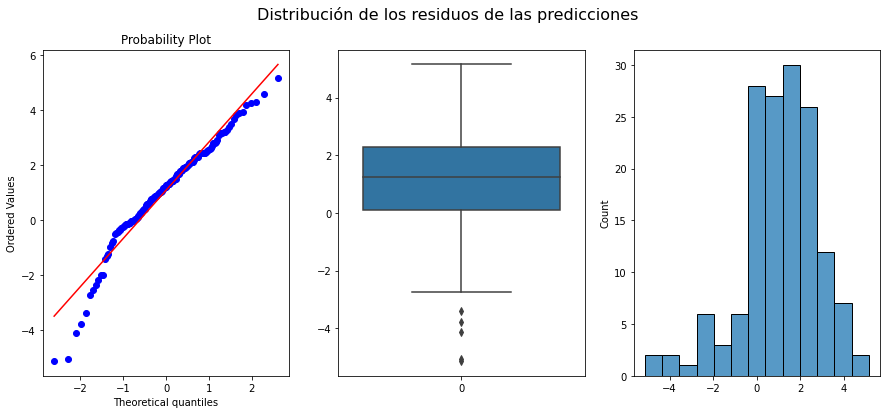

In [131]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15,6)
plt.suptitle("Distribución de los residuos de las predicciones", size = 16)


sns.histplot(data = error_sarima, ax = axs[2]);
scipy.stats.probplot(error_sarima, plot = axs[0], fit=True, dist='norm');
sns.boxplot( data = error_sarima, ax = axs[1]);


En el boxplot se puede ver claro que los errores se encuentran sesgados, ya que la media no es 0.

Se puede ver que el QQ plot presenta una cola inferior pesada, lo que demuestra lo antes indicado, el modelo predice mal los mínimos de consumo ya que se deben a causas exógenas.

Se realizará un mismo análisis con un modelo ARIMA sin estacionalidad.

### ARIMA

### AutoARIMA sin estacionalidad

Se utilizarán los mismos datos para el train y test.

En este caso el modelo no tendrá estacionalidad, y como se debe difencia 1 sola vez se le indicará al AutoARIMA que el modelo tiene un parámetro d = 1.

In [284]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA

#auto_arima(train, start_p=0, max_p=5, d = 0, start_q=0, max_q=5,
#           start_P=0, max_P=5, D=0, start_Q=0, max_Q=5,
#           seasonal=True, m=7, trace=True, stepwise=True, maxiter = 100 ).summary()
#
auto_arima(train, start_p=0, max_p=7, d = 1, start_q=0, max_q=7, m = 7,
           seasonal=False, trace=True, stepwise=True, maxiter = 100 ).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3397.562, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3354.542, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3228.655, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3395.563, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3175.325, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3168.538, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3308.517, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3169.064, Time=0.46 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3169.574, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3170.439, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3288.677, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3168.553, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3166.540, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3173.327, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  609
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1579.270
Date:                Tue, 05 Dec 2023   AIC                           3166.540
Time:                        00:55:13   BIC                           3184.180
Sample:                    10-01-2021   HQIC                          3173.403
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.033     10.160      0.000       0.273       0.404
ar.L2         -0.1246      0.043     -2.921      0.003      -0.208      -0.041
ma.L1         -0.9423      0.016    -57.558      0.000      -0.974      -0.910
sigma2        10.5281      0.353     29.858      0.000       9.837      11.219
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               755.83
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -1.24
Prob(H) (two-sided):                  0.56   Kurtosis:                         7.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Todos los pvalor de los coeficientes arrojados por el AutoARIMA son menores a 0.05, por lo que se incluirán todos en el análisis.

Como el AutoARIMA no recomienda incluir un parámetro de intercepto se le pasa a la función SARIMAX el argumento ***trend = 'n'***.

In [285]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as tsa

In [286]:
modelo_arima = SARIMAX(train, order=(2,1,1), seasonal_order=(0, 0, 0, 0), trend="n")
modelo_arima = modelo_arima.fit()
print(modelo_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                Consumo   No. Observations:                  609
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1579.270
Date:                Tue, 05 Dec 2023   AIC                           3166.540
Time:                        00:55:14   BIC                           3184.180
Sample:                    10-01-2021   HQIC                          3173.403
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.033     10.160      0.000       0.273       0.404
ar.L2         -0.1246      0.043     -2.921      0.003      -0.208      -0.041
ma.L1         -0.9423      0.016    -57.558      0.0

Nuevamente, en el summary de la función SARIMAX se puede comprobar que todos los parámetros del modelo son estadísticamente significativos.

El modelo cuenta con 2 parámetros autorregresivos AR y un parámetro MA(1), sumado a una diferenciación de la serie en el lag1.

In [287]:
print(f"Los parametros que arroja el modelo son= \n {modelo_arima.params} ")

Los parametros que arroja el modelo son= 
 ar.L1      0.338585
ar.L2     -0.124645
ma.L1     -0.942256
sigma2    10.528113
dtype: float64 


In [288]:
print(f"Los criterios de informacion que arroja el modelo son \n -Akaike= {modelo_arima.aic} \n -Bayesiano= {modelo_arima.bic} \n -Hannan-Quinn {modelo_arima.hqic}")

Los criterios de informacion que arroja el modelo son 
 -Akaike= 3166.5395184029703 
 -Bayesiano= 3184.180217930835 
 -Hannan-Quinn 3173.4026108288776


In [289]:
print(f" La media de los residuos del modelo es=  {modelo_arima.resid.mean()}")

 La media de los residuos del modelo es=  0.08619130075095399


In [290]:
print(f" La varianza de los residuos del modelo es=  {modelo_arima.resid.var()}")

 La varianza de los residuos del modelo es=  13.91667417184439


La media de los residuos se encuentra muy cercana a 0, aunque los residuos presentan una gran varianza.

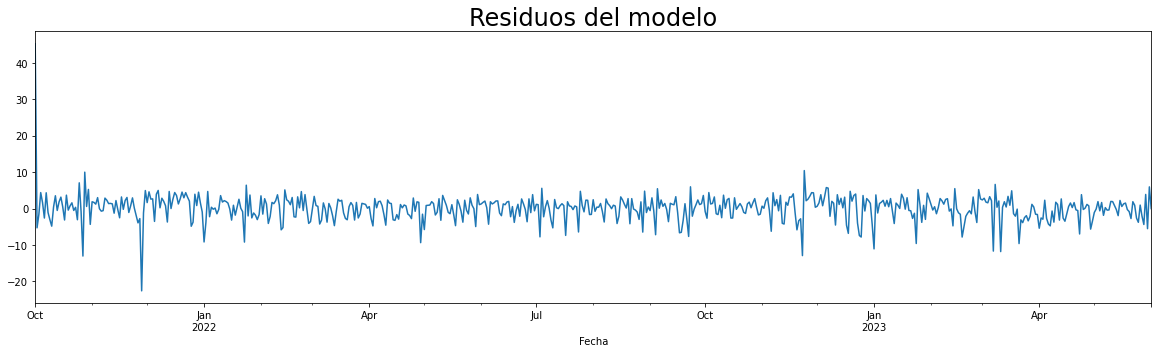

In [291]:
modelo_arima.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()

Se realiza la prueba de Ljung-Box sobre los residuos.

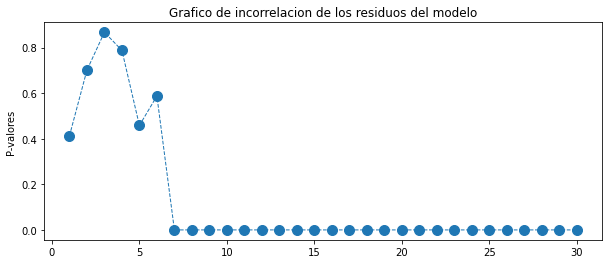

In [178]:
Incorr_residuos_arima = sm.stats.acorr_ljungbox(modelo_arima.resid, lags=30);
plt.plot(Incorr_residuos_arima.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1);
plt.title("Grafico de incorrelacion de los residuos del modelo");
plt.ylabel("P-valores ");

Hay grandes errores al principio del modelo y luego mejoran. No hay correlación en los residuos.

Se analiza la distribución de los residuos.

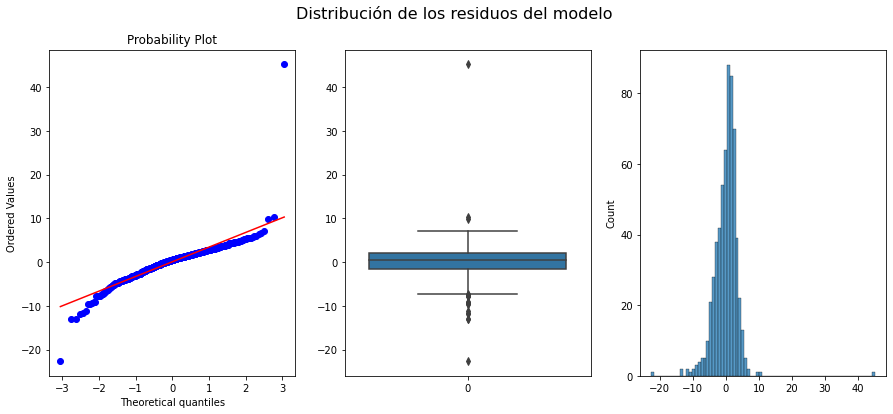

In [143]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15,6)
plt.suptitle("Distribución de los residuos del modelo", size = 16)


sns.histplot(data = modelo_arima.resid, ax = axs[2]);
scipy.stats.probplot(modelo_arima.resid, plot = axs[0], fit=True, dist='norm');
sns.boxplot( data = modelo_arima.resid, ax = axs[1]);


La cola superior del QQ plot del modelo ARIMA presenta una menor cantidad de puntos fuera de la norma que el modelo SARIMA.
Se puede ver que el QQ plot presenta una cola inferior pesada, lo que demuestra lo antes indicado, el modelo predice mal los mínimos de consumo ya que se deben a causas exógenas.

La media de los residuos es cercana a 0, aunque parece tener un pequeño sesgo a ser algo menor.

### Predicciones ARIMA

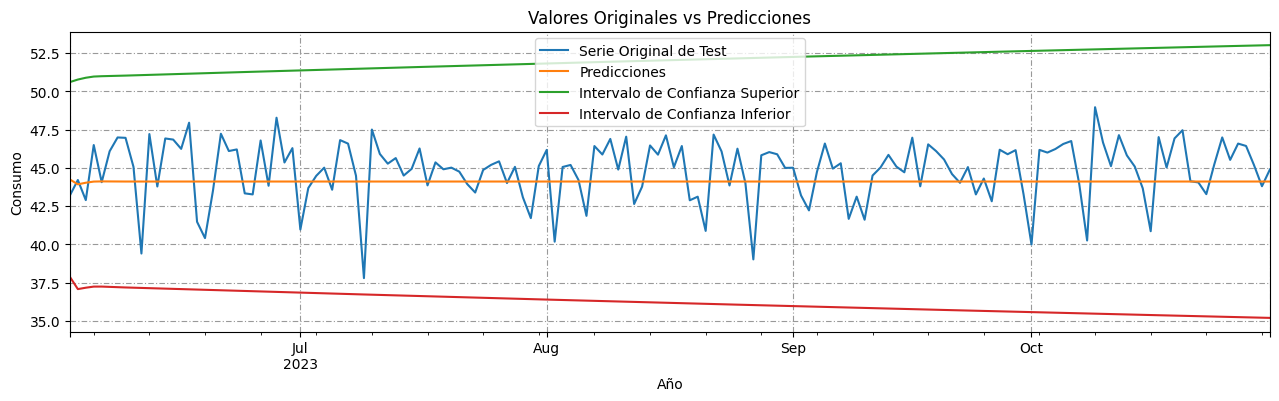

In [144]:
predicciones_arima = modelo_arima.get_forecast(cant_test)


# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test, predicciones_arima.predicted_mean, predicciones_arima.conf_int())

#plt.ylim((30,60))

Aparentemente el modelo predice únicamente la media del consumo. Al no tener la componente estacional no es capaz de predecir este comportamiento. El modelo predice peor que el SARIMA.

In [150]:
#error_relativo_sarima = (test[:cant_test] - predicciones_sarima.predicted_mean) / test[:cant_test] * 100
# Se retiran de los errores de los valores nulos en serie original.
# Estos valores son imposibles de predecir.
#error_relativo_sarima = error_relativo_sarima[error_relativo_sarima >-40]*100
error_arima = test - predicciones_arima.predicted_mean

<AxesSubplot:xlabel='Fecha'>

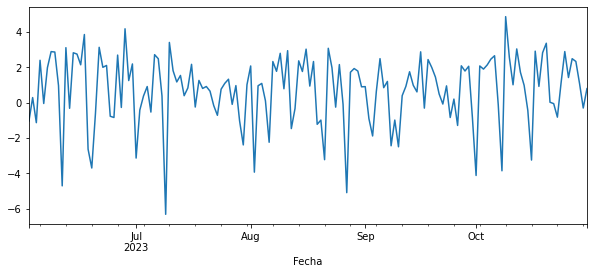

In [151]:
error_arima.plot()

In [152]:
print('La media del error absoluto de las predicciones es =',round(np.mean(error_arima),2))
print('El valor máximo del error absoluto de las predicciones es =',round(np.max(error_arima),2))
print('El valor mínimo del error absoluto de las predicciones es =',round(np.min(error_arima),2))
print('La varianza del error de las predicciones es =',round(np.var(error_arima),2))


La media del error absoluto de las predicciones es = 0.71
El valor máximo del error absoluto de las predicciones es = 4.85
El valor mínimo del error absoluto de las predicciones es = -6.31
La varianza del error de las predicciones es = 3.78


In [153]:
#Evaluamos las métricas del modelo
evaluar_metricas(test[:cant_test], predicciones_arima.predicted_mean )

MSE: 4.288694806362597
MAE: 1.6983013271444825
RMSE: 2.070916417039229
MAPE: 0.038


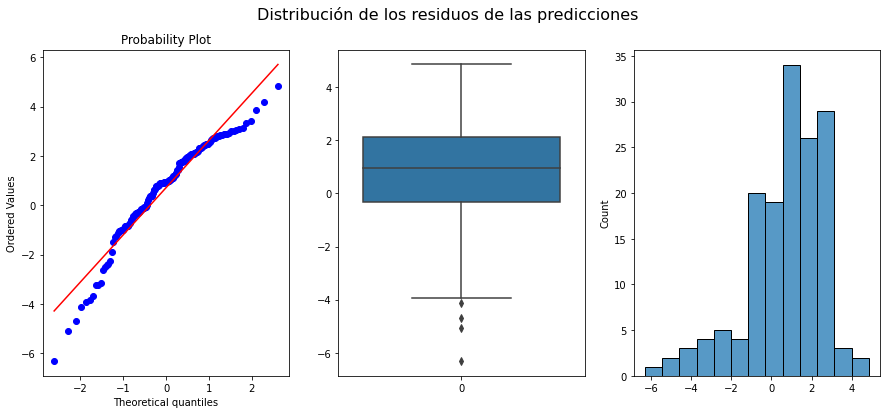

In [154]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15,6)
plt.suptitle("Distribución de los residuos de las predicciones", size = 16)


sns.histplot(data = error_arima, ax = axs[2]);
scipy.stats.probplot(error_arima, plot = axs[0], fit=True, dist='norm');
sns.boxplot( data = error_arima, ax = axs[1]);


En el boxplot se puede ver claro que los errores se encuentran sesgados, ya que la media no es 0.

Hay una asimetría a la izquierda en la distribución de los residuos. 

Se puede ver que el QQ plot presenta una cola inferior y superior pesadas, lo que demuestra que el modelo no predice correctamente los valores alejados de la media.

### Conclusión

In [162]:
datos = {'Modelos': ['SARIMA','ARIMA'],
         'AIC': [modelo_sarima.aic, modelo_arima.aic],
         'BIC': [modelo_sarima.bic, modelo_arima.bic],
         'MAE': [modelo_sarima.mae, modelo_arima.mae],
         'MSE': [modelo_sarima.mse, modelo_arima.mse]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

,Modelos,AIC,BIC,MAE,MSE
0,SARIMA,3021.104152,3038.705182,2.603479,30.560210
1,ARIMA,3166.539518,3184.180218,2.490109,13.901251


Como era de esperarse el modelo SARIMA con estacionalidad predice mejor los valores que un ARIMA sin estacionalidad. Como no se consiguió que la serie sea estacionaria, se espera un mal desempeño del modelo ARIMA.

----------------------------------------